In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('insurance.csv')
for column in df.columns:
    if df.dtypes[column] in ['int64', 'float64']:
        continue
    df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)

In [8]:
print(df)

      age sex     bmi  children smoker region      charges
0      19   0  27.900         0      1      2  16884.92400
1      18   1  33.770         1      0      3   1725.55230
2      28   1  33.000         3      0      3   4449.46200
3      33   1  22.705         0      0      0  21984.47061
4      32   1  28.880         0      0      0   3866.85520
...   ...  ..     ...       ...    ...    ...          ...
1333   50   1  30.970         3      0      0  10600.54830
1334   18   0  31.920         0      0      1   2205.98080
1335   18   0  36.850         0      0      3   1629.83350
1336   21   0  25.800         0      0      2   2007.94500
1337   61   0  29.070         0      1      0  29141.36030

[1338 rows x 7 columns]


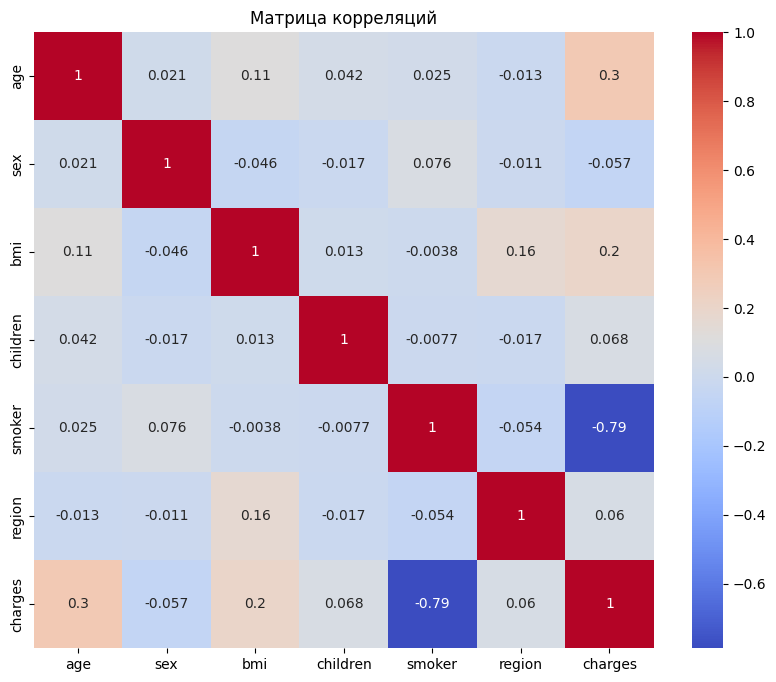

In [5]:
# Визуализируйте матрицу корреляций в виде тепловой карты
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

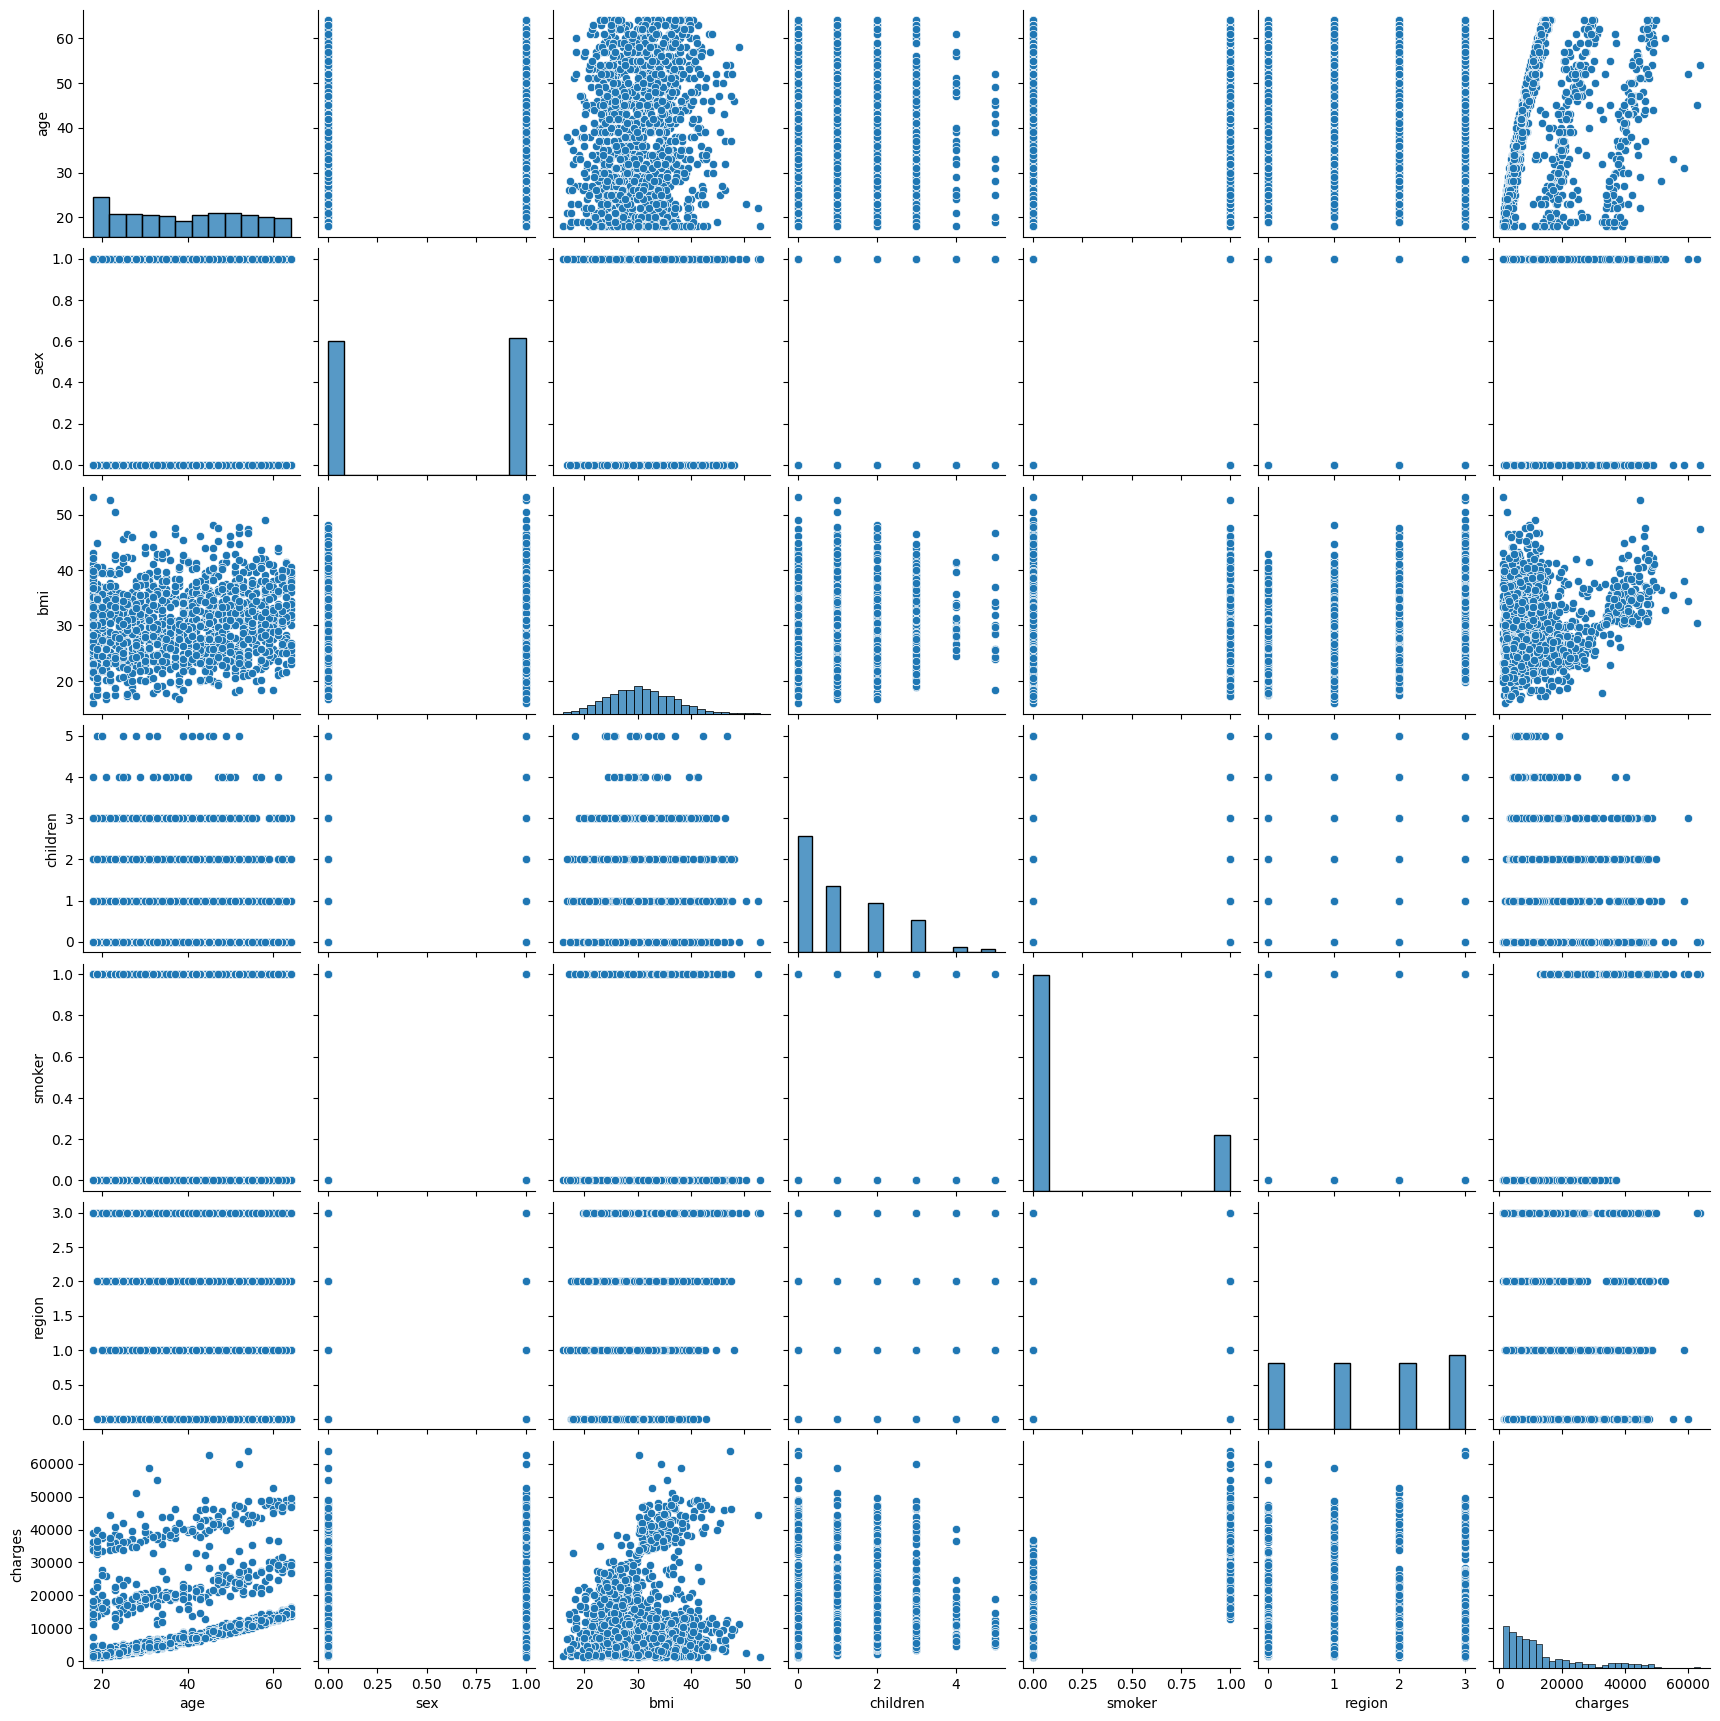

In [5]:
# Постройте матрицу диаграмм рассеяния
sns.pairplot(df)
plt.show()

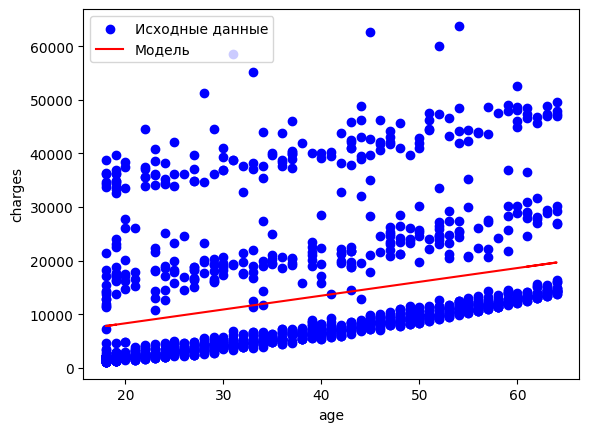

Mean Absolute Error (MAE): 9055.14962050455
R^2 Score: 0.08940589967885804


In [6]:
selected_column = 'age'
X = df[[selected_column]]
y = df['charges']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, c='b', label='Исходные данные')
plt.plot(X, y_pred, c='r', label='Модель')
plt.xlabel(selected_column)
plt.ylabel('charges')
plt.legend()
plt.show()

# Оцените качество полученной модели
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

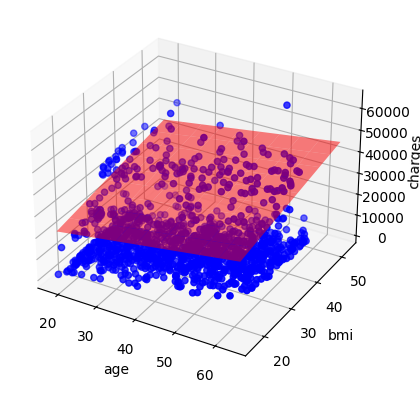

In [7]:
selected_columns = ['age', 'smoker', 'bmi']
X = df[selected_columns]
y = df['charges']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

age_range = np.linspace(df['age'].min(), df['age'].max(), 10)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 10)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)
X_grid = pd.DataFrame({'age': age_grid.ravel(), 'smoker': 0, 'bmi': bmi_grid.ravel()})
y_pred_grid = model.predict(X_grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'], c='b', label='Исходные данные')
ax.plot_surface(age_grid, bmi_grid, y_pred_grid.reshape(age_grid.shape), alpha=0.5, color='r')
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Метрики на обучающих данных:")
print(f"MAE: {mae_train}")
print(f"R^2: {r2_train}")
print()
print("Метрики на тестовых данных:")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")

Метрики на обучающих данных:
MAE: 4214.004592609105
R^2: 0.7391825813507149

Метрики на тестовых данных:
MAE: 4227.839410886214
R^2: 0.7780796098591228


1. Что такое корреляция? 
   - статистическая мера, которая описывает степень линейной взаимосвязи между двумя переменными
   - Позволяет оценить, насколько сильно и в каком направлении две переменные изменяются вместе
2.  Что показывает коэффициент корреляции? Каким он может быть? 
   - показывает силу и направление линейной связи между двумя переменными
   - может быть от -1 (обратная линейная связь) до 1 (прямая связь) через 0 (отсутствие связи)
3.  Что представляет из себя модель простой линейной регрессии? 
   - статистическая модель, используемая для описания линейной взаимосвязи между одной независимой переменной и одной зависимой переменной
4.  Чем множественная линейная регрессия отличается от простой 
линейной регрессии? 
   - множественная моделирует линейную взаимосвязь между зависимой переменной и двумя или более независимыми переменными
5.  Что характеризует коэффициент детерминации? 
   - статистическая мера, которая оценивает, какая часть изменчивости зависимой переменной может быть объяснена моделью регрессии
   - представляет собой долю дисперсии зависимой переменной, которая может быть объяснена независимыми переменными в модели
6.  Как сложность модели влияет на коэффициент детерминации?
   - Если модель слишком примитивная, то коэффициент детерминации будет занижен
   - Если модель использует слишком много параметров, создаётся слишком много шума